In [1]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules, fpgrowth
from scipy.sparse import csr_matrix

In [2]:
# Load the dataset
file_path = 'data.csv'
sales_data = pd.read_csv(file_path)

sales_data.head()

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country
0,581482,12/9/2019,22485,Set Of 2 Wooden Market Crates,21.47,12,17490.0,United Kingdom
1,581475,12/9/2019,22596,Christmas Star Wish List Chalkboard,10.65,36,13069.0,United Kingdom
2,581475,12/9/2019,23235,Storage Tin Vintage Leaf,11.53,12,13069.0,United Kingdom
3,581475,12/9/2019,23272,Tree T-Light Holder Willie Winkie,10.65,12,13069.0,United Kingdom
4,581475,12/9/2019,23239,Set Of 4 Knick Knack Tins Poppies,11.94,6,13069.0,United Kingdom


In [3]:
# Clean the data by handling null values
sales_data.dropna(subset=['ProductName', 'Quantity'], inplace=True)

# Filtering less frequent products


# min_product_frequency = 20  # or another threshold suitable for your dataset
# product_frequency = sales_data['ProductName'].value_counts()
# frequent_products = product_frequency[product_frequency >= min_product_frequency].index
# sales_data = sales_data[sales_data['ProductName'].isin(frequent_products)]

# FPGrowth

In [4]:
# Transform the dataset into a basket format
basket = (sales_data
          .groupby(['TransactionNo', 'ProductName'])['Quantity']
          .sum().unstack().reset_index().fillna(0)
          .set_index('TransactionNo'))
basket = (basket > 0).astype(int)

In [5]:
basket.shape

(23204, 3768)

In [6]:
basket.head()

ProductName,10 Colour Spaceboy Pen,12 Coloured Party Balloons,12 Daisy Pegs In Wood Box,12 Egg House Painted Wood,12 Hanging Eggs Hand Painted,12 Ivory Rose Peg Place Settings,12 Message Cards With Envelopes,12 Pencil Small Tube Woodland,12 Pencils Small Tube Red Retrospot,12 Pencils Small Tube Skull,...,Zinc Metal Heart Decoration,Zinc Star T-Light Holder,Zinc Sweetheart Soap Dish,Zinc Sweetheart Wire Letter Rack,Zinc T-Light Holder Star Large,Zinc T-Light Holder Stars Small,Zinc Top 2 Door Wooden Shelf,Zinc Willie Winkie Candle Stick,Zinc Wire Kitchen Organiser,Zinc Wire Sweetheart Letter Tray
TransactionNo,,,,,,,,,,,,,,,,,,,,,
536365,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536366,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536367,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536368,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536369,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
# Apply the Apriori algorithm to find frequent itemsets
min_support = 0.01
frequent_itemsets = fpgrowth(basket, min_support=min_support, use_colnames=True)


c:\SmartCart_MBA\streamlit_app\venv\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [8]:
# Generate association rules
min_confidence = 0.4
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=min_confidence)


rules["antecedents"] = rules["antecedents"].apply(lambda x: ", ".join(list(x)))
rules["consequents"] = rules["consequents"].apply(lambda x: ", ".join(list(x)))

In [9]:
if 'lift' not in rules:
    rules['lift'] = rules['confidence'] / (rules['consequent support'] / rules['antecedent support'])

if 'leverage' not in rules:
    rules['leverage'] = (rules['support'] - (rules['antecedent support'] * rules['consequent support'])) / (rules['antecedent support'] * rules['consequent support'])

if 'conviction' not in rules:
    rules['conviction'] = (1 - rules['consequent support']) / (1 - rules['confidence'])

In [10]:
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,Hand Warmer Union Jack,Hand Warmer Owl Design,0.020643,0.028185,0.010171,0.492693,17.480812,0.009589,1.915636,0.962667
1,Love Building Block Word,Home Building Block Word,0.027107,0.033529,0.012800,0.472178,14.082802,0.011891,1.831056,0.954876
2,Poppy's Playhouse Kitchen,Poppy's Playhouse Bedroom,0.018833,0.018230,0.013489,0.716247,39.290304,0.013146,3.459949,0.993254
3,Poppy's Playhouse Bedroom,Poppy's Playhouse Kitchen,0.018230,0.018833,0.013489,0.739953,39.290304,0.013146,3.773033,0.992644
4,Jam Making Set Printed,Jam Making Set With Jars,0.050078,0.048828,0.020341,0.406196,8.318956,0.017896,1.601829,0.926173


In [11]:
rules.shape

(764, 10)

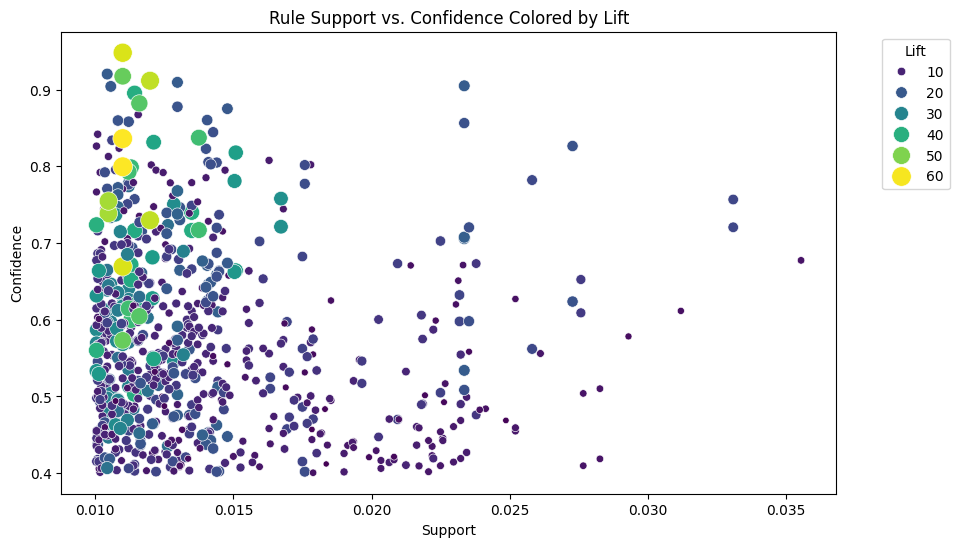

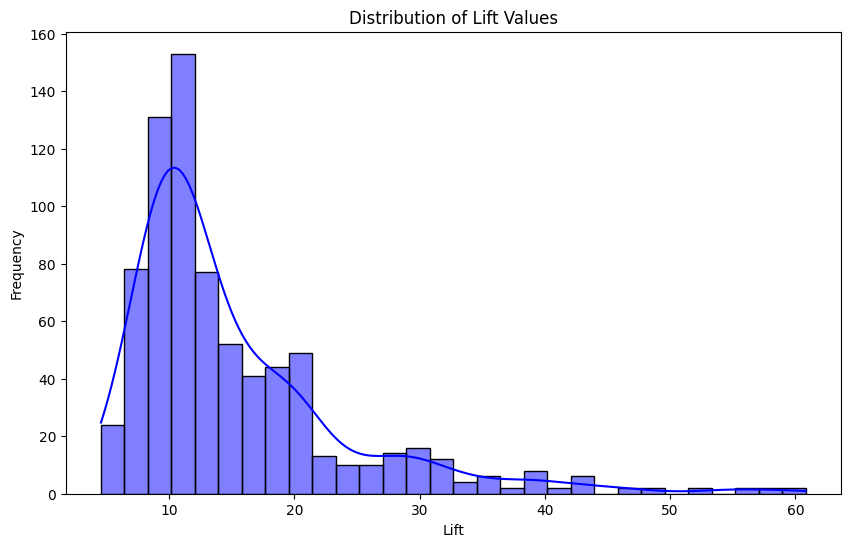

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'rules' is your DataFrame containing the association rules with 'lift' calculated
# Filter rules based on lift > 1 for visualization
rules_filtered = rules[rules['lift'] > 1]

# Scatter plot of Confidence vs Support, colored by Lift
plt.figure(figsize=(10, 6))
sns.scatterplot(x='support', y='confidence', data=rules_filtered, size='lift', hue='lift', palette='viridis', sizes=(20, 200))
plt.title('Rule Support vs. Confidence Colored by Lift')
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.legend(title='Lift', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Histogram of Lift values
plt.figure(figsize=(10, 6))
sns.histplot(rules_filtered['lift'], kde=True, color='blue')
plt.title('Distribution of Lift Values')
plt.xlabel('Lift')
plt.ylabel('Frequency')
plt.show()


In [18]:
rules.to_csv('association_rules_fpgrowth.csv', index=False)

In [19]:
def recommend(rules, current_cart):
    """
    Generates a list of recommendations based on the current cart contents, adjusted for string representation of antecedents and consequents.

    Parameters:
    rules (DataFrame): The DataFrame containing the association rules.
    current_cart (set): A set of items currently in the shopping cart.

    Returns:
    list: A list of recommended items.
    """
    recommendations = set()
    for _, rule in rules.iterrows():
        antecedents = set(rule["antecedents"].split(", "))
        consequents = set(rule["consequents"].split(", "))
        if current_cart.issubset(antecedents):
            recommendations.update(consequents - current_cart)
    return list(recommendations)


In [20]:
# Example usage
current_cart = {'Poppy\'s Playhouse Bedroom'}
recommended_items = recommend(rules, current_cart)
print(recommended_items)

["Poppy's Playhouse Kitchen"]


In [3]:
norway = sales_data[sales_data['Country'] == 'Norway'].copy()
norway["Date"] = pd.to_datetime(norway["Date"], format="%m/%d/%Y")
norway["CustomerNo"] = norway["CustomerNo"].fillna(-1)
norway["month"] = norway["Date"].dt.month
norway["year"] = norway["Date"].dt.year
norway = norway[norway["month"].isin([10, 11, 12])].copy()
norway.head()


,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country,month,year
20,581476,2019-12-09,23198,Pantry Magnetic Shopping List,11.53,48,12433.0,Norway,12,2019
21,581476,2019-12-09,23197,Sketchbook Magnetic Shopping List,11.74,24,12433.0,Norway,12,2019
22,581476,2019-12-09,23184,Bull Dog Bottle Opener,15.32,8,12433.0,Norway,12,2019
23,581476,2019-12-09,23168,Classic Cafe Sugar Dispenser,11.53,12,12433.0,Norway,12,2019
24,581476,2019-12-09,23167,Small Ceramic Top Storage Jar,10.96,96,12433.0,Norway,12,2019


In [4]:
basket = (norway
          .groupby(['TransactionNo', 'ProductName'])['Quantity']
          .sum().unstack().reset_index().fillna(0)
          .set_index('TransactionNo'))
basket = (basket > 0).astype(int)

In [5]:
basket.shape

(13, 272)

In [6]:
basket.head()

ProductName,12 Pencils Tall Tube Skulls,12 Pencils Tall Tube Woodland,20 Dolly Pegs Retrospot,200 Red + White Bendy Straws,3 Piece Spaceboy Cookie Cutter Set,36 Foil Heart Cake Cases,60 Cake Cases Vintage Christmas,60 Teatime Fairy Cake Cases,72 Sweetheart Fairy Cake Cases,Advent Calendar Gingham Sack,...,Wooden School Colouring Set,Woodland Bunnies Lolly Makers,Woodland Height Chart Stickers,Woodland Mini Backpack,Woodland Storage Box Small,Yellow Coat Rack Paris Fashion,You're Confusing Me Metal Sign,Zinc Heart Flower T-Light Holder,Zinc T-Light Holder Star Large,Zinc T-Light Holder Stars Small
TransactionNo,,,,,,,,,,,,,,,,,,,,,
536532,0,0,1,1,0,1,0,1,1,0,...,1,0,0,0,0,0,0,0,0,0
537868,0,0,1,1,0,1,0,1,1,0,...,1,0,0,0,0,0,0,0,0,0
570793,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
573035,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
573108,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1


In [7]:
basket.to_csv('basket.csv', index = True)

In [10]:
# Apply the Apriori algorithm to find frequent itemsets
min_support = 0.3
frequent_itemsets = fpgrowth(basket, min_support=min_support, use_colnames=True)

c:\Users\shahs\Desktop\5500\project\data\venv\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [11]:
frequent_itemsets

,support,itemsets
0,0.307692,(Recipe Box Retrospot)
1,0.307692,(Recipe Box Pantry Yellow Design)
2,0.307692,(Popcorn Holder)
3,0.307692,(N0 Singing Metal Sign)
4,0.307692,(Hot Water Bottle Tea And Sympathy)
...,...,...
65,0.307692,"(Recipe Box Retrospot, N0 Singing Metal Sign, ..."
66,0.307692,"(Recipe Box Retrospot, Recipe Box Pantry Yello..."
67,0.307692,"(Recipe Box Retrospot, Recipe Box Pantry Yello..."
68,0.307692,"(Recipe Box Retrospot, Recipe Box Pantry Yello..."


In [12]:
# Generate association rules
min_confidence = 0.5
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=min_confidence)
rules["antecedents"] = rules["antecedents"].apply(lambda x: ", ".join(list(x)))
rules["consequents"] = rules["consequents"].apply(lambda x: ", ".join(list(x)))

In [13]:
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,Recipe Box Retrospot,Recipe Box Pantry Yellow Design,0.307692,0.307692,0.307692,1.0,3.25,0.213018,inf,1.0
1,Recipe Box Pantry Yellow Design,Recipe Box Retrospot,0.307692,0.307692,0.307692,1.0,3.25,0.213018,inf,1.0
2,Popcorn Holder,Recipe Box Pantry Yellow Design,0.307692,0.307692,0.307692,1.0,3.25,0.213018,inf,1.0
3,Recipe Box Pantry Yellow Design,Popcorn Holder,0.307692,0.307692,0.307692,1.0,3.25,0.213018,inf,1.0
4,Popcorn Holder,Recipe Box Retrospot,0.307692,0.307692,0.307692,1.0,3.25,0.213018,inf,1.0
...,...,...,...,...,...,...,...,...,...,...
597,Recipe Box Pantry Yellow Design,"Recipe Box Retrospot, N0 Singing Metal Sign, P...",0.307692,0.307692,0.307692,1.0,3.25,0.213018,inf,1.0
598,N0 Singing Metal Sign,"Recipe Box Retrospot, Recipe Box Pantry Yellow...",0.307692,0.307692,0.307692,1.0,3.25,0.213018,inf,1.0
599,Popcorn Holder,"Recipe Box Retrospot, Recipe Box Pantry Yellow...",0.307692,0.307692,0.307692,1.0,3.25,0.213018,inf,1.0
600,Gin And Tonic Mug,"Recipe Box Retrospot, Recipe Box Pantry Yellow...",0.307692,0.307692,0.307692,1.0,3.25,0.213018,inf,1.0


# Collaborative Filtering

In [14]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
from scipy.sparse import csr_matrix

# Load the dataset
data_path = 'data.csv'
data = pd.read_csv(data_path)

# Create a user-item matrix where rows represent users and columns represent items
user_item_matrix = data.pivot_table(index='CustomerNo', columns='ProductNo', values='Quantity', fill_value=0)

# Convert the user-item matrix into a sparse matrix format for efficient calculations
sparse_user_item = csr_matrix(user_item_matrix.values)

# Calculate cosine similarity between users
user_similarity = cosine_similarity(sparse_user_item)

# Convert cosine similarity matrix to a DataFrame for easier handling
user_similarity_df = pd.DataFrame(user_similarity, index=user_item_matrix.index, columns=user_item_matrix.index)

def recommend_products_for_user(user_id, user_similarity_df, user_item_matrix, top_n=5):
    # Find the top N similar users
    similar_users = user_similarity_df[user_id].sort_values(ascending=False).iloc[1:top_n+1].index
    
    # Get the products bought by the similar users
    products_bought_by_similar_users = user_item_matrix.loc[similar_users].sum().sort_values(ascending=False)
    
    # Filter out the products already bought by the target user
    products_already_bought = user_item_matrix.loc[user_id]
    recommended_products = products_bought_by_similar_users.index[~products_bought_by_similar_users.index.isin(products_already_bought[products_already_bought > 0].index)]
    
    return recommended_products[:top_n]

# Example usage
user_id = 13069.0  # Example user ID
recommended_products = recommend_products_for_user(user_id, user_similarity_df, user_item_matrix, top_n=5)
print("Recommended Products for User ID", user_id, ":", recommended_products)


Recommended Products for User ID 13069.0 : Index(['23493', '20972', '22621', '22142', '22610'], dtype='object', name='ProductNo')


In [15]:
data[data['ProductNo'].isin(list(recommended_products))]['ProductName'].unique()

array(['Vintage Doily Travel Sewing Kit',
       'Pink Cream Felt Craft Trinket Box', 'Traditional Knitting Nancy',
       'Christmas Craft White Fairy', 'Pens Assorted Funny Face'],
      dtype=object)

# Matrix Factorization Technique

In [6]:
from surprise import Dataset, Reader
from surprise import SVD
from surprise.model_selection import train_test_split
from surprise import accuracy

# Load the dataset
data_path = 'data.csv'
data = pd.read_csv(data_path)

# Since Surprise needs a dataset with user, item, and rating, we'll assume Quantity as implicit ratings
# Create a dataset for Surprise
reader = Reader(rating_scale=(data['Quantity'].min(), data['Quantity'].max()))
data_surprise = Dataset.load_from_df(data[['CustomerNo', 'ProductNo', 'Quantity']], reader)

# Split the dataset into training and test set
trainset, testset = train_test_split(data_surprise, test_size=0.25)

# Use SVD algorithm
algo = SVD()

# Train the algorithm on the trainset
algo.fit(trainset)

# Predict ratings for the testset
predictions = algo.test(testset)

# Calculate RMSE
accuracy.rmse(predictions)

# Function to make recommendations for a user
def recommend_for_user(user_id, algo, data, n=5):
    # Get the list of all product IDs
    all_product_ids = data['ProductNo'].unique()
    
    # Get the list of product IDs that the user has already bought
    bought_product_ids = data[data['CustomerNo'] == user_id]['ProductNo'].unique()
    
    # Predict the rating for all products the user hasn't bought
    predictions = [algo.predict(user_id, product_id) for product_id in all_product_ids if product_id not in bought_product_ids]
    
    # Sort the predictions based on estimated ratings
    predictions.sort(key=lambda x: x.est, reverse=True)
    
    # Return the top n product IDs
    return [pred.iid for pred in predictions[:n]]

# Example usage
user_id = 13069.0  # Example user ID
recommended_products = recommend_for_user(user_id, algo, data, n=5)
print("Recommended Products for User ID", user_id, ":", recommended_products)


RMSE: 80985.8709
Recommended Products for User ID 13069.0 : ['22485', '23198', '23197', '23184', '23168']


In [7]:
from surprise import SVD
from surprise.model_selection import GridSearchCV

# Define the parameter grid to search over
param_grid = {
    'n_factors': [50, 100, 150],  # Number of factors
    'n_epochs': [20, 30],  # Number of epochs
    'lr_all': [0.005, 0.01],  # Learning rate
    'reg_all': [0.02, 0.05]  # Regularization term
}

# Use GridSearchCV to find the best SVD parameters
gs = GridSearchCV(SVD, param_grid, measures=['rmse'], cv=3)

# Prepare the data as before
data_path = 'data.csv'
data = pd.read_csv(data_path)
reader = Reader(rating_scale=(data['Quantity'].min(), data['Quantity'].max()))
data_surprise = Dataset.load_from_df(data[['CustomerNo', 'ProductNo', 'Quantity']], reader)

# Fit the grid search to the data
gs.fit(data_surprise)

# Best RMSE score
print("Best RMSE score:", gs.best_score['rmse'])

# Combination of parameters that gave the best RMSE score
print("Best parameters:", gs.best_params['rmse'])


Best RMSE score: 80985.2945843773
Best parameters: {'n_factors': 50, 'n_epochs': 20, 'lr_all': 0.005, 'reg_all': 0.02}
